## Initialization Phase + Data Info

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [33]:
df = pd.read_csv('df_LCU_filtered.csv', index_col=0)
df_PPI = pd.read_csv('malaysia_produce.csv')
df_PPI = df_PPI[df_PPI.Element == 'Producer Price Index (2014-2016 = 100)']

In [34]:
df_PPI

,Iso3,StartDate,EndDate,Area,Item Code,Item,Element,Year,Months Code,Months,Value
0,MYS,01/01/1991,31/12/1991,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1991,7021,Annual value,43
1,MYS,01/01/1992,31/12/1992,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1992,7021,Annual value,43
2,MYS,01/01/1993,31/12/1993,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1993,7021,Annual value,44
3,MYS,01/01/1994,31/12/1994,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1994,7021,Annual value,45
4,MYS,01/01/1995,31/12/1995,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1995,7021,Annual value,45
...,...,...,...,...,...,...,...,...,...,...,...
9923,MYS,01/01/2015,31/12/2015,Malaysia,1800,"Vegetables&Melons, Total",Producer Price Index (2014-2016 = 100),2015,7021,Annual value,97
9924,MYS,01/01/2016,31/12/2016,Malaysia,1800,"Vegetables&Melons, Total",Producer Price Index (2014-2016 = 100),2016,7021,Annual value,101
9925,MYS,01/01/2017,31/12/2017,Malaysia,1800,"Vegetables&Melons, Total",Producer Price Index (2014-2016 = 100),2017,7021,Annual value,105
9926,MYS,01/01/2018,31/12/2018,Malaysia,1800,"Vegetables&Melons, Total",Producer Price Index (2014-2016 = 100),2018,7021,Annual value,104


### Filtered DF_LCU dataframe with accurate entries with ascending years

In [17]:
df.head()

,index,Iso3,StartDate,EndDate,Area,Item Code,Item,Element,Year,Months Code,Months,Value
0,29,MYS,01/01/2004,31/12/2004,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2004,7021,Annual value,9130
1,30,MYS,01/01/2005,31/12/2005,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2005,7021,Annual value,11080
2,31,MYS,01/01/2006,31/12/2006,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2006,7021,Annual value,17780
3,32,MYS,01/01/2007,31/12/2007,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2007,7021,Annual value,12600
4,33,MYS,01/01/2008,31/12/2008,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2008,7021,Annual value,14650


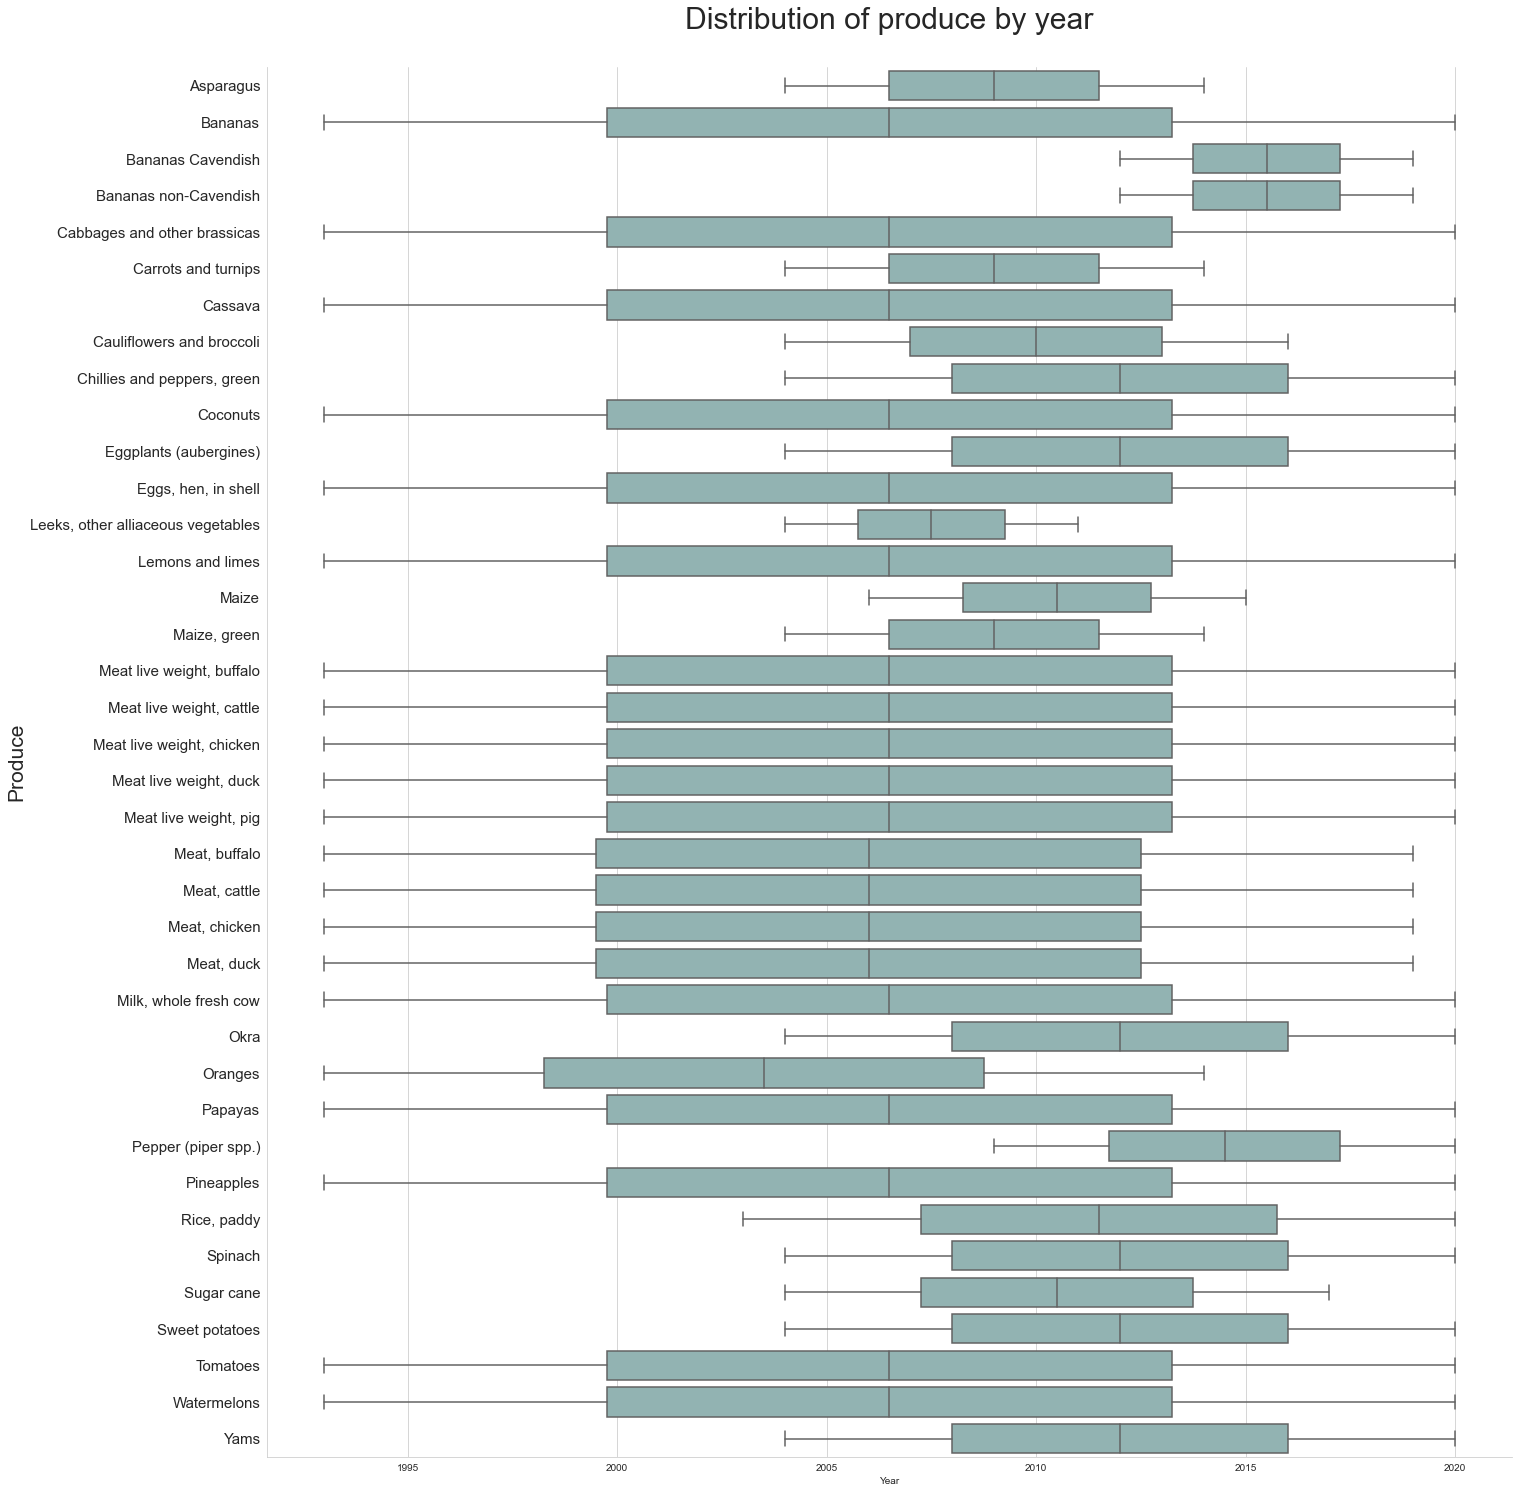

In [31]:
g = sns.catplot(
    data = df[df.Months == 'Annual value'],
    y = 'Item',
    x = 'Year',
    #aspect = 2.5,
    height = 20,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_title('Distribution of produce by year\n', fontdict={'fontsize':30})
g.ax.set_yticklabels(df.Item.unique(), fontsize = '15')
g.ax.set_ylabel('Produce', fontsize = '21')
plt.show()